In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [42]:
cat_feat = ['Extracurricular Activities']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, cat_feat)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5
0,0.0,1.0,7.0,99.0,9.0,1.0
1,1.0,0.0,4.0,82.0,4.0,2.0
2,0.0,1.0,8.0,51.0,7.0,2.0
3,0.0,1.0,5.0,52.0,5.0,2.0
4,1.0,0.0,7.0,75.0,8.0,5.0


In [43]:
scale = StandardScaler(with_mean=True, with_std=True)
poly = PolynomialFeatures(2, include_bias=False, interaction_only=True)
transformed_X = poly.fit_transform(transformed_X)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, shuffle=True)
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [44]:
tol_adm = 0.01
iter_adm = 1000000

In [74]:
r2 = []
mae = []
length = []

n = 1000
a = np.linspace(0.0001, 0.5, n)

for i in range(n):
  model_tune = ElasticNet(alpha = a[i], tol=tol_adm, max_iter=iter_adm)
  X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 33, shuffle=True)
  model_tune.fit(X_tr, y_tr)
  mae.append(mean_absolute_error(model_tune.predict(X_val), y_val))
  r2.append(model_tune.score(X_val, y_val))
  length.append(np.linalg.norm(model_tune.coef_, 1))

(0.0, 0.1)

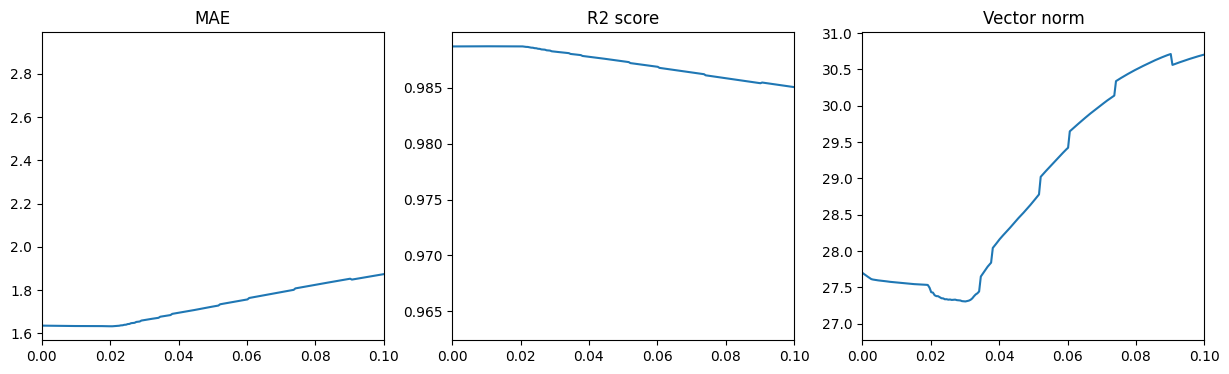

In [78]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4))
plt.sca(axs[0])
plt.title('MAE')
plt.plot(a, mae)
plt.xlim(0, 0.1)
plt.sca(axs[1])
plt.title('R2 score')
plt.plot(a, r2)
plt.xlim(0, 0.1)
plt.sca(axs[2])
plt.title('Vector norm')
plt.plot(a, length)
plt.xlim(0, 0.1)

In [80]:
model_ElasticNet = ElasticNet(alpha=0.02, fit_intercept=True, tol=tol_adm, max_iter=iter_adm)
model_ElasticNet.fit(X_train, y_train)
model_ElasticNet.score(X_test, y_test), mean_absolute_error(model_ElasticNet.predict(X_test), y_test), np.count_nonzero(model_ElasticNet.coef_)

(0.987792274206248, 1.6695425375463804, 16)